<h1>EDA de Datos de Películas: Exploración y Visualización</h1>
Para el análisis exploratorio de datos enfocado en seleccionar variables para el modelo de recomendación de películas, se realizará un estudio detallado del dataset limpio, utilizando gráficos y visualizaciones para explorar patrones y tendencias. Se priorizarán variables como género, director, actores principales, presupuesto, ingresos y año de lanzamiento, evaluando su correlación y relevancia para el éxito cinematográfico. Los hallazgos guiarán la selección de variables clave para el entrenamiento del modelo, asegurando que las características más influyentes en las preferencias del público sean adecuadamente consideradas y preparadas para el análisis.

<h3>Librerías</h3>• </b>Pandas:</b> La biblioteca fundamental para manipular y analizar datos en Python. Ofrece una amplia gama de funciones para cargar, limpiar, explorar y visualizar datos.</br> 
• </b>Matplotlib:</b> La biblioteca de visualización de datos en Python. Ofrece una interfaz de alto nivel para la generación de gráficos y visualizaciones.</br>
• </b>Seaborn:</b> Extensión de Matplotlib que facilita la creación de visualizaciones de datos estadísticos atractivas e informativas.

In [1]:
import pandas as pd
import matplotlib as matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [2]:
ruta_movies_dataset = r'C:\Users\Practical Tecno\Desktop\HENRY\Henry_Proyecto_Individual_1_Memolli\datasets\movies_limpio.parquet'
credit_crew_dataset = r'C:\Users\Practical Tecno\Desktop\HENRY\Henry_Proyecto_Individual_1_Memolli\datasets\credit_crew_limpio.parquet'
credit_cast_dataset = r'C:\Users\Practical Tecno\Desktop\HENRY\Henry_Proyecto_Individual_1_Memolli\datasets\credit_cast_limpio.parquet'

df_movies = pd.read_parquet(ruta_movies_dataset)
df_credit_crew = pd.read_parquet(credit_crew_dataset)
df_credit_cast = pd.read_parquet(credit_cast_dataset)

<h3>Exploración Inicial y limpieza de datos</h3>

In [3]:
df_credit_crew.head()

,id,crew_name
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer


In [4]:
df_credit_cast.head()

,id,cast_character,cast_name,cast_order
0,862,Woody (voice),Tom Hanks,0.0
1,862,Buzz Lightyear (voice),Tim Allen,1.0
2,862,Mr. Potato Head (voice),Don Rickles,2.0
3,862,Slinky Dog (voice),Jim Varney,3.0
4,8844,Alan Parrish,Robin Williams,0.0


In [5]:
df_movies.head()

,budget,id,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_year,return,genres_name,production_companies_name,production_countries_name,spoken_languages_name
0,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Toy Story,7.7,5415,1995,12.451801,Animation,Pixar Animation Studios,United States of America,English
1,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Toy Story,7.7,5415,1995,12.451801,Comedy,Pixar Animation Studios,United States of America,English
2,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Toy Story,7.7,5415,1995,12.451801,Family,Pixar Animation Studios,United States of America,English
3,65000000,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Jumanji,6.9,2413,1995,4.043035,Adventure,TriStar Pictures,United States of America,English
4,65000000,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Jumanji,6.9,2413,1995,4.043035,Adventure,Teitler Film,United States of America,English


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133599 entries, 0 to 133598
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   budget                     133599 non-null  int32  
 1   id                         133599 non-null  int64  
 2   overview                   133599 non-null  object 
 3   popularity                 133599 non-null  float64
 4   release_date               133599 non-null  object 
 5   revenue                    133599 non-null  int32  
 6   runtime                    133599 non-null  float64
 7   title                      133599 non-null  object 
 8   vote_average               133599 non-null  float64
 9   vote_count                 133599 non-null  int32  
 10  release_year               133599 non-null  int32  
 11  return                     133599 non-null  float64
 12  genres_name                133599 non-null  object 
 13  production_companies_name  13

In [7]:
df_credit_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48999 entries, 0 to 48998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         48999 non-null  int64 
 1   crew_name  48999 non-null  object
dtypes: int64(1), object(1)
memory usage: 765.7+ KB


In [8]:
df_credit_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157914 entries, 0 to 157913
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              157914 non-null  int64  
 1   cast_character  157914 non-null  object 
 2   cast_name       157914 non-null  object 
 3   cast_order      157914 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


Analizamos los duplicados de los DF

In [9]:
print(f"La suma de los valores duplicados para el Dataframe de Movies es de {df_movies.duplicated().sum()}")
print(f"La suma de los valores duplicados para el Dataframe de Credit_crew {df_credit_crew.duplicated().sum()}")
print(f"La suma de los valores duplicados para el Dataframe de Credit_cast es de {df_credit_cast.duplicated().sum()}")

La suma de los valores duplicados para el Dataframe de Movies es de 0
La suma de los valores duplicados para el Dataframe de Credit_crew 1
La suma de los valores duplicados para el Dataframe de Credit_cast es de 0


In [10]:
#Elimino el director duplicados
df_credit_crew.drop_duplicates(inplace=True)

Verificamos los nulos

In [11]:
df_movies.isnull().sum()

budget                       0
id                           0
overview                     0
popularity                   0
release_date                 0
revenue                      0
runtime                      0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
genres_name                  0
production_companies_name    0
production_countries_name    0
spoken_languages_name        0
dtype: int64

In [12]:
#Se procede a eliminar los 684 registros nulos de la columna "spoken_languages_name", ya que estos campos podrían no ser útiles para el modelo.
df_movies.dropna(subset=['spoken_languages_name'], inplace=True)

In [13]:
df_credit_crew.isnull().sum()

id           0
crew_name    0
dtype: int64

In [14]:
df_credit_cast.isnull().sum()

id                0
cast_character    0
cast_name         0
cast_order        0
dtype: int64

In [15]:
#No elimino la columna "cast_character" ya que no influye en el análisis que estoy realizando.

Transformamos los datos, de float a int

In [16]:
df_movies['popularity'] = df_movies['popularity'].astype(int)
df_credit_cast['cast_order'] = df_credit_cast['cast_order'].astype(int)

Para el análisis, estoy creando un nuevo DataFrame para evitar repeticiones que observamos durante el proceso de extracción, transformación y carga (ETL). No estoy modificando la base de datos limpiaque creamos, ya que necesitamos conservar los datos sin alteraciones para el modelo.

In [17]:
df_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,1.335990e+05,133599.000000,133599.000000,1.335990e+05,133599.000000,133599.000000,133599.000000,133599.000000,1.335990e+05
mean,1.430126e+07,92178.499248,5.532130,3.608203e+07,103.873884,5.991931,340.822416,2002.406695,1.070732e+03
std,3.250190e+07,113907.173058,9.910279,1.168755e+08,28.177512,1.264337,908.330055,11.990957,1.048152e+05
min,0.000000e+00,2.000000,0.000000,-2.147484e+09,0.000000,0.000000,0.000000,1970.000000,-9.061112e+00
25%,0.000000e+00,13027.000000,1.000000,0.000000e+00,91.000000,5.400000,12.000000,1996.000000,0.000000e+00
50%,0.000000e+00,39859.000000,4.000000,0.000000e+00,100.000000,6.100000,43.000000,2006.000000,0.000000e+00
75%,1.200000e+07,123104.000000,8.000000,1.156081e+07,114.000000,6.800000,219.000000,2012.000000,4.767167e-01
max,3.800000e+08,469172.000000,547.000000,2.068224e+09,931.000000,10.000000,14075.000000,2017.000000,1.239638e+07


In [18]:
movies_id_unico = df_movies.drop_duplicates(subset='id')
movies_id_unico.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,2.482100e+04,24821.000000,24821.000000,2.482100e+04,24821.000000,24821.000000,24821.000000,24821.000000,2.482100e+04
mean,7.546959e+06,104064.216228,3.888683,1.990981e+07,100.281254,5.878913,188.627976,2000.933564,7.527696e+02
std,2.298459e+07,118687.637155,7.607620,8.506971e+07,31.060441,1.463206,651.249462,13.215327,8.356326e+04
min,0.000000e+00,2.000000,0.000000,-2.147484e+09,0.000000,0.000000,0.000000,1970.000000,-9.061112e+00
25%,0.000000e+00,16932.000000,0.000000,0.000000e+00,90.000000,5.300000,7.000000,1992.000000,0.000000e+00
50%,0.000000e+00,47753.000000,2.000000,0.000000e+00,98.000000,6.100000,21.000000,2005.000000,0.000000e+00
75%,1.800000e+06,156708.000000,6.000000,5.065600e+04,110.000000,6.800000,85.000000,2012.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.000000,2.068224e+09,931.000000,10.000000,14075.000000,2017.000000,1.239638e+07


❗❗❗ <b>Observación:</b> Como sospechaba, hay cambios muy significativos en los datos. Por lo tanto, es importante ser cuidadosos si vamos a entrenar un modelo utilizando datos de tipo entero (int) o flotante (float), ya que podríamos obtener resultados que no reflejen correctamente la realidad de los datos transformados.

In [19]:
df_movies['genres_name'].value_counts()

genres_name
Drama              30338
Comedy             17166
Thriller           13790
Action             11134
Romance             9002
Crime               7115
Horror              7046
Adventure           6147
Science Fiction     5095
Mystery             4033
Fantasy             4000
Family              3930
Animation           2945
Documentary         2663
History             2447
War                 2009
Music               1635
Foreign             1403
TV Movie             910
Western              791
Name: count, dtype: int64

In [20]:
valores_unicos_genres = df_movies[['id', 'genres_name']].drop_duplicates()
valores_unicos_genres['genres_name'].value_counts()

genres_name
Drama              12044
Comedy              7850
Thriller            5404
Action              4594
Romance             3770
Horror              3241
Crime               2764
Adventure           2344
Science Fiction     2113
Family              1839
Mystery             1593
Fantasy             1590
Documentary         1422
Animation           1336
History              831
Music                737
Foreign              705
War                  664
TV Movie             493
Western              335
Name: count, dtype: int64

❗❗❗ <b>Observación:</b> Se han observado cambios significativos en la frecuencia con la que se repiten los géneros de las películas, e incluso se han notado variaciones en el ranking de estas repeticiones. Para las evaluaciones futuras, seguiremos utilizando el filtro para mayor comodidad y consistencia en los datos analizados.

In [21]:
valores_unicos_companias = df_movies[['id', 'production_companies_name']].drop_duplicates()
valores_unicos_companias['production_companies_name'].value_counts()

production_companies_name
Warner Bros.                              709
Universal Pictures                        629
Paramount Pictures                        560
Canal+                                    420
Twentieth Century Fox Film Corporation    418
                                         ... 
Isis Cataegis                               1
Les Mille et Une Marches                    1
Cote Blanche Productions                    1
Layton                                      1
Sine Olivia                                 1
Name: count, Length: 20753, dtype: int64

In [22]:
valores_unicos_paises_origen = df_movies[['id', 'production_countries_name']].drop_duplicates()
valores_unicos_paises_origen['production_countries_name'].value_counts()

production_countries_name
United States of America                11193
United Kingdom                           1893
France                                   1771
Canada                                   1177
Germany                                   955
                                        ...  
United States Minor Outlying Islands        1
Czechoslovakia                              1
Saudi Arabia                                1
Mauritania                                  1
Azerbaijan                                  1
Name: count, Length: 138, dtype: int64

In [23]:
valores_unicos_lenguaje = df_movies[['id', 'spoken_languages_name']].drop_duplicates()
valores_unicos_lenguaje['spoken_languages_name'].value_counts()

spoken_languages_name
English     16182
Français     1512
日本語           794
Deutsch       743
Español       669
            ...  
ਪੰਜਾਬੀ          1
Somali          1
?????           1
Hausa           1
پښتو            1
Name: count, Length: 70, dtype: int64

In [24]:
#Ranking de directores según el número de películas dirigidas.
df_credit_crew['crew_name'].value_counts()

crew_name
John Ford            68
Michael Curtiz       65
Werner Herzog        55
Alfred Hitchcock     53
Georges Méliès       51
                     ..
Jorge Dorado          1
Michael Rosenbaum     1
Lawrie Brewster       1
Connie Stevens        1
Daisy Asquith         1
Name: count, Length: 19740, dtype: int64

In [25]:
#Ranking de actores según el número de películas en las que han trabajado.
actores = df_credit_cast[['id', 'cast_name']].drop_duplicates()
actores['cast_name'].value_counts()

cast_name
John Wayne               107
Jackie Chan               94
Robert De Niro            92
Michael Caine             91
Gérard Depardieu          89
                        ... 
Gabriela Aguilera          1
Stephania Barbagelata      1
Thomas Durand              1
Iabe Lapacas               1
Aleksandr Chabrov          1
Name: count, Length: 57630, dtype: int64

<b>👀Primeras observaciones:</b></br>
• Hay que tener en cuenta los filtros que se utilicen para una mayor precisión.</br>
• El presupuesto promedio por película es de aproximadamente 6 millones de dolres, aunque el valor mínimo de 0 indica que hay datos que no se cargaron correctamente. .</br>
• Los ingresos promedio son de aproximadamente 16 millones de dólares, con una desviación estándar extremadamente alta. Esto snos puede hablar de una gran disperción de los datos. Los primeros percentiles tienen valores de 0 lo que nos puede indicar que, o no se registraron ingresos o no tuvieron ingresos significativos.</br>
• La popularidad media es 3.36, con un valor mínimo de 0 y un máximo de 547.</br>
• La duración media de las películas es de 98.39 minutos, con un valor mínimo de 0 minutos y un máximo de 931 minutos.</br>
• La calificación promedio de las películas es de 5,85, siendo el mínimo 0 y el máximo 10.</br>
• La película que menos votos obtuvo tiene 0, y la que más votos recibió tuvo 14.075.</br>
• Los 5 géneros más importantes son: Drama, Comedia,Thriller, Accióin y Romance</br>
• Las 5 productoras con más pelícuals son: Warner Bros., Universal Pictures, Paramount Pictures, Canal+ y Twentieth Century Fox Film Corporation</br>
• Los 5 países con más películas son: United States of America, United Kingdom, France, Canada, Germany</br>
• Los 5 idiomas principales son: Inglés, Francés, Japonés, Alemán, Español</br>
• Los 5 directores que más películas dirigieron son: John Ford, Michael Curtiz, Werner Herzog, Alfred Hitchcock, Georges Méliès</br>
• Los 5 actores que más aparecieron en las películas son: John Wayne , Jackie Chan, Robert De Niro, Michael Caine , Gérard Depardieu</br>



<h3>Análisis Univariado</h3>

Distribución de variables:

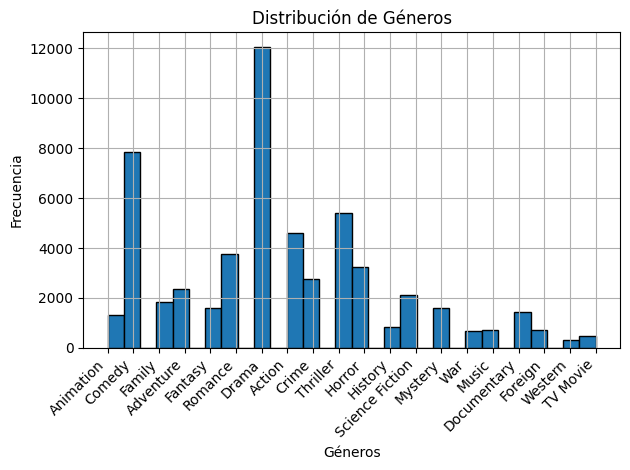

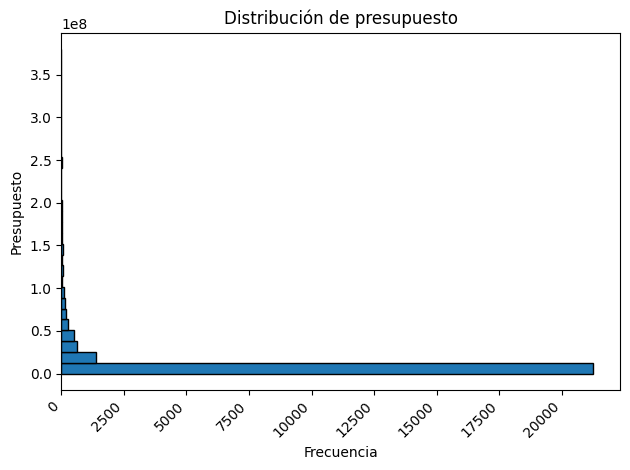

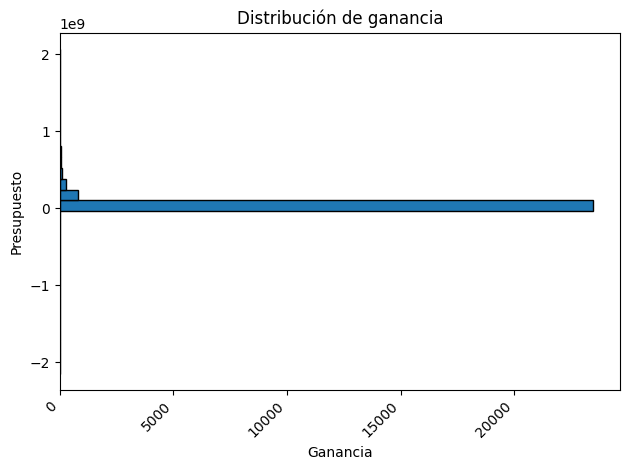

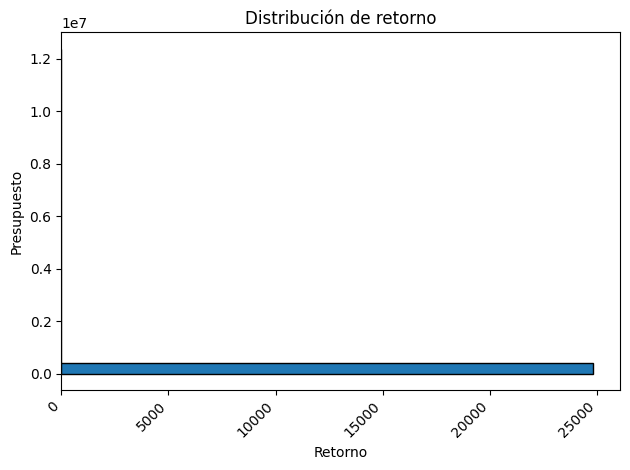

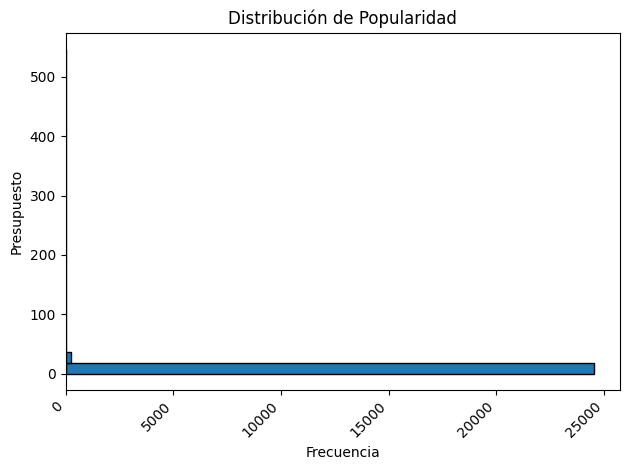

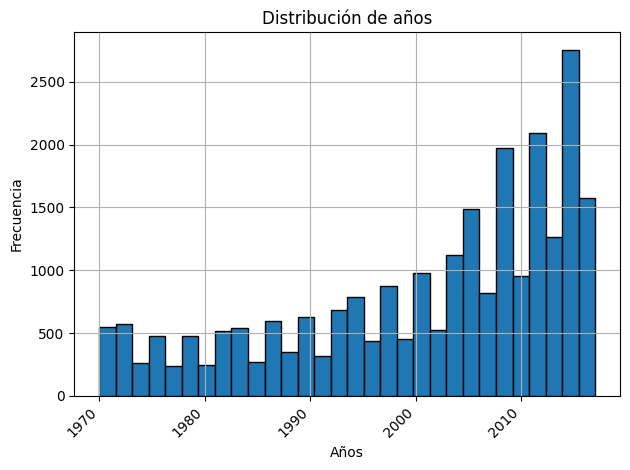

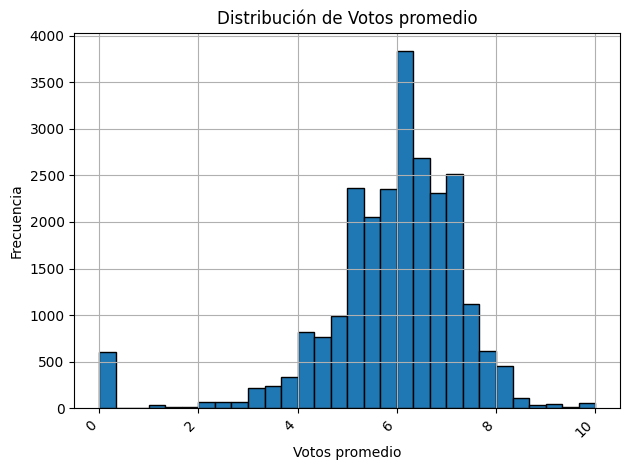

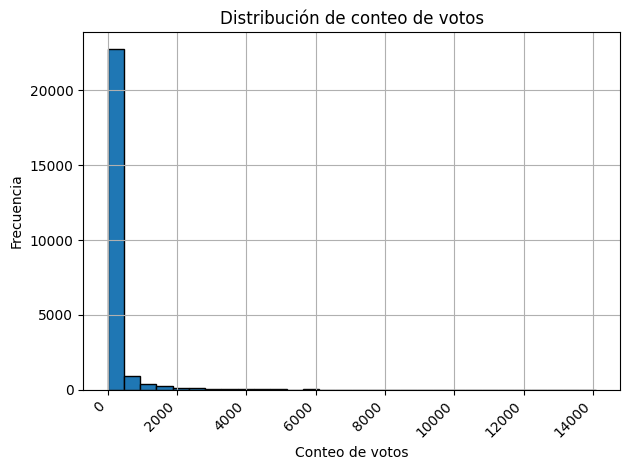

In [26]:
#Histograma Distribución de Géneros
valores_unicos_genres['genres_name'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Géneros')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#Histograma de presupuestos
plt.hist(movies_id_unico['budget'], bins=30, edgecolor='black', orientation='horizontal')
plt.title('Distribución de presupuesto')
plt.xlabel('Frecuencia')
plt.ylabel('Presupuesto')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#Histograma de ganancia
plt.hist(movies_id_unico['revenue'], bins=30, edgecolor='black', orientation='horizontal')
plt.title('Distribución de ganancia')
plt.xlabel('Ganancia')
plt.ylabel('Presupuesto')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#Histograma de retorno
plt.hist(movies_id_unico['return'], bins=30, edgecolor='black', orientation='horizontal')
plt.title('Distribución de retorno')
plt.xlabel('Retorno')
plt.ylabel('Presupuesto')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#Histograma de popularidad
plt.hist(movies_id_unico['popularity'], bins=30, edgecolor='black', orientation='horizontal')
plt.title('Distribución de Popularidad')
plt.xlabel('Frecuencia')
plt.ylabel('Presupuesto')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#Histograma de años
movies_id_unico['release_year'].hist(bins=30, edgecolor='black')
plt.title('Distribución de años')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#Histograma de voto promedio
movies_id_unico['vote_average'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Votos promedio')
plt.xlabel('Votos promedio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


#Histograma de conteo de votos
movies_id_unico['vote_count'].hist(bins=30, edgecolor='black')
plt.title('Distribución de conteo de votos')
plt.xlabel('Conteo de votos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

<h3>Análisis Bivariado</h3>

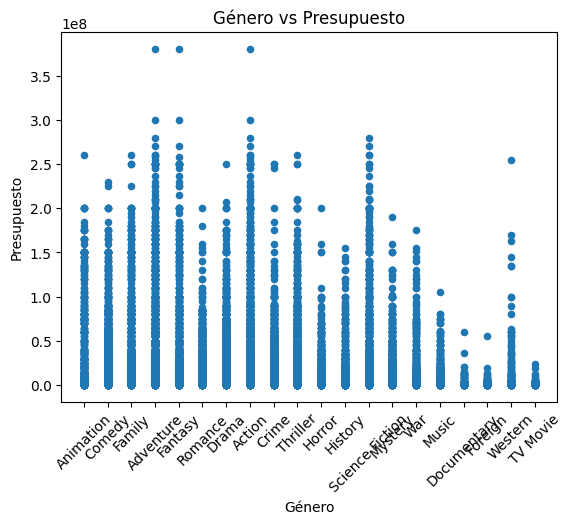

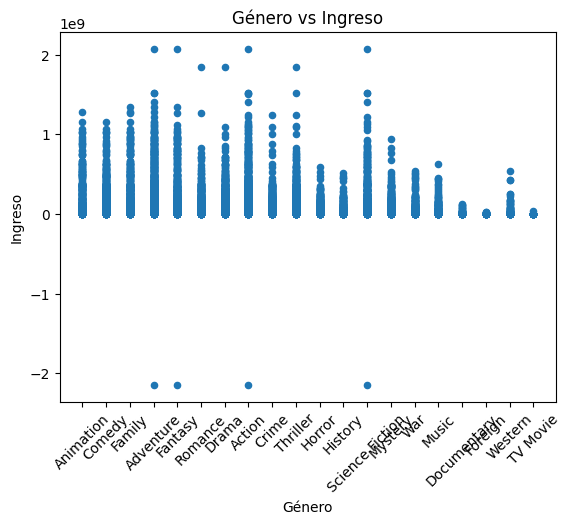

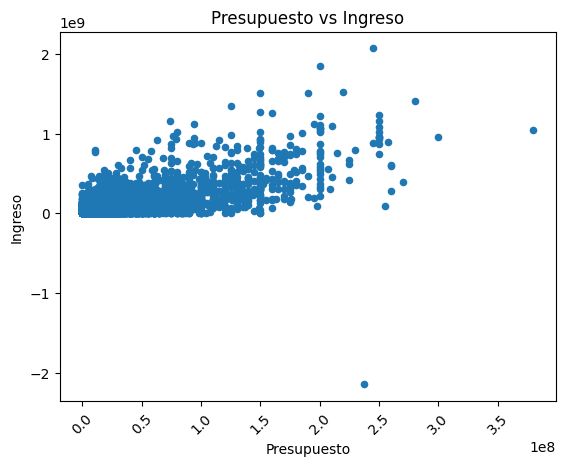

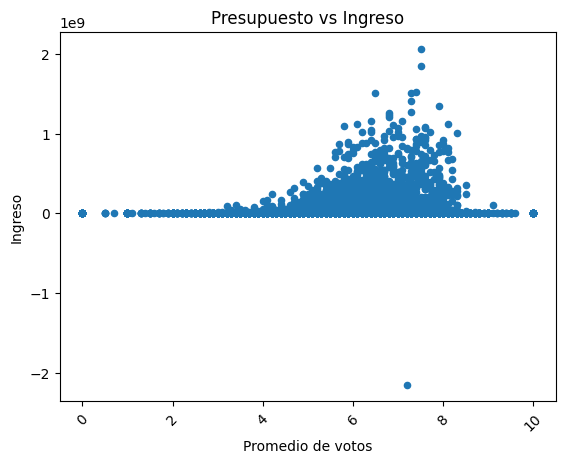

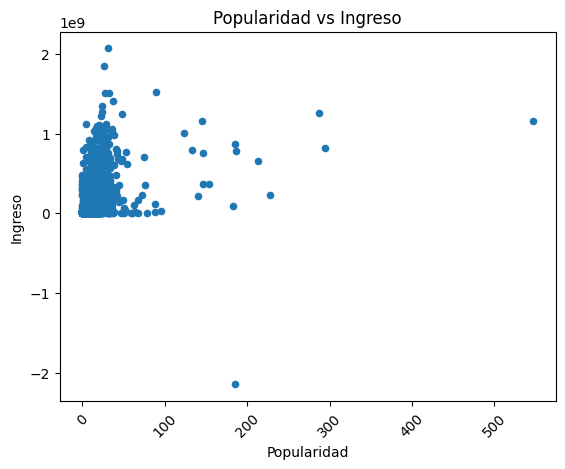

In [27]:
#Queiro ver las correlaciones entre: 

#GÉNERO y PRESUPUESTO: 
#Tener en cuenta que en el df_movies había datos que se repetían mucho con lo cual voy a trabajar con variables que fui creando con los valores únicos, 
# lo que tengo que unir los DF con valores único y eliminar los nulos en caso de que se creen. 
df_unificado = pd.merge(valores_unicos_genres, movies_id_unico[['id', 'budget', 'revenue']], on='id')
df_unificado = df_unificado.dropna(subset=['budget','revenue'])

df_unificado.plot.scatter(x='genres_name', y='budget')
plt.xlabel('Género')
plt.ylabel('Presupuesto')
plt.title('Género vs Presupuesto')
plt.xticks(rotation=45)
plt.show()


#GÉNERO e INGRESO: 
df_unificado.plot.scatter(x='genres_name', y='revenue')
plt.xlabel('Género')
plt.ylabel('Ingreso')
plt.title('Género vs Ingreso')
plt.xticks(rotation=45)
plt.show()

#PRESUPUESTO e INGRESO: 
movies_id_unico.plot.scatter(x='budget', y='revenue')
plt.xlabel('Presupuesto')
plt.ylabel('Ingreso')
plt.title('Presupuesto vs Ingreso')
plt.xticks(rotation=45)
plt.show()

#PROMEDIO DE VOTOS e INGRESO: 
movies_id_unico.plot.scatter(x='vote_average', y='revenue')
plt.xlabel('Promedio de votos')
plt.ylabel('Ingreso')
plt.title('Presupuesto vs Ingreso')
plt.xticks(rotation=45)
plt.show()

#POPULARIDAD e INGRESO: 
movies_id_unico.plot.scatter(x='popularity', y='revenue')
plt.xlabel('Popularidad')
plt.ylabel('Ingreso')
plt.title('Popularidad vs Ingreso')
plt.xticks(rotation=45)
plt.show()

<h3>Análisis Multivariado</h3>

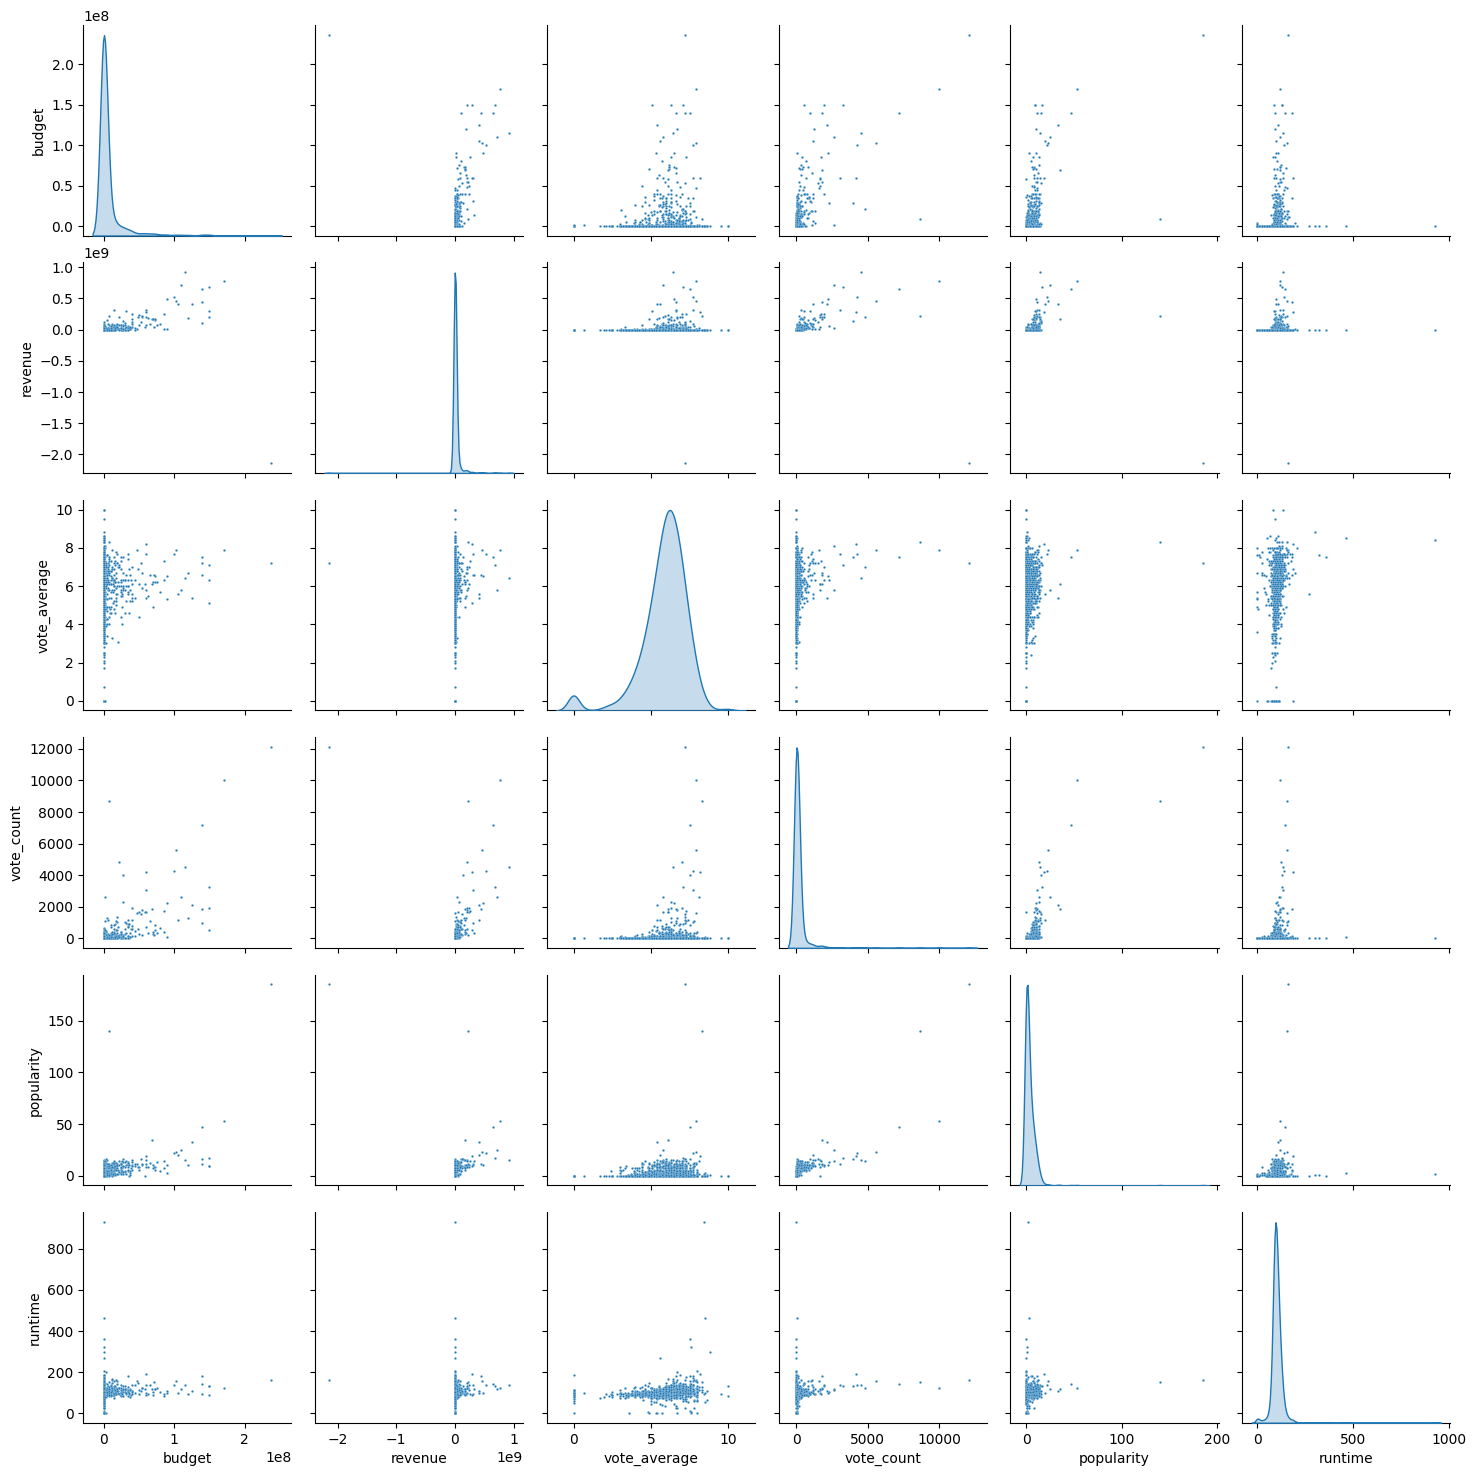

In [28]:
#Como son muchos datos seleccionamos 1000 filas aleatorias. 
# Para entender mejor las relaciones entre nuestras variables de interés, generamos un pairplot utilizando una muestra representativa de los datos
movies_id_unico_multivariado = movies_id_unico[['budget', 'revenue', 'vote_average', 'vote_count', 'popularity', 'runtime']].sample(n=1000, random_state=42)
sns.pairplot(movies_id_unico_multivariado, diag_kind="kde", plot_kws={"s": 3})


In [29]:
movies_id_unico_multivariado.corr(), 

(                budget   revenue  vote_average  vote_count  popularity  \
 budget        1.000000  0.312434      0.097993    0.692713    0.553224   
 revenue       0.312434  1.000000      0.062171    0.162403   -0.175867   
 vote_average  0.097993  0.062171      1.000000    0.158196    0.139981   
 vote_count    0.692713  0.162403      0.158196    1.000000    0.812074   
 popularity    0.553224 -0.175867      0.139981    0.812074    1.000000   
 runtime       0.115133  0.044063      0.203625    0.129392    0.105552   
 
                runtime  
 budget        0.115133  
 revenue       0.044063  
 vote_average  0.203625  
 vote_count    0.129392  
 popularity    0.105552  
 runtime       1.000000  ,)

<Axes: >

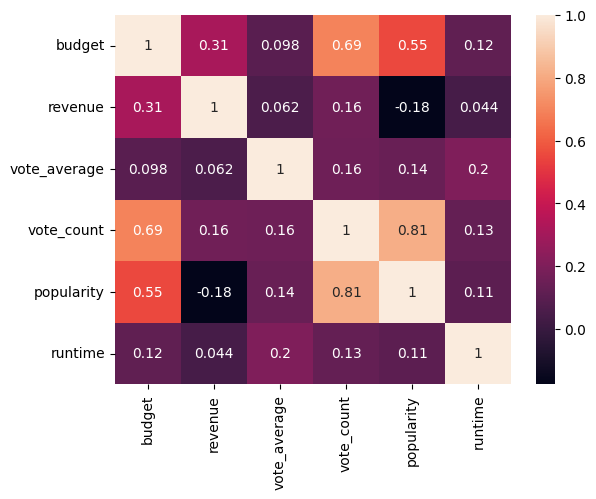

In [30]:
sns.heatmap(movies_id_unico_multivariado.corr(), annot=True)

<b>Presupuesto e Ingresos:</b> Existe una correlación positiva significativa de 0.82 entre el presupuesto (budget) y los ingresos (revenue) de las películas. Esto sugiere que generalmente, películas con mayores presupuestos tienden a generar mayores ingresos.

<b>Número de Votos e Ingresos:</b> Hay una correlación positiva fuerte de 0.77 entre el número de votos (vote_count) y los ingresos (revenue). Esto indica que películas que reciben más votos también suelen generar más ingresos.

<b>Popularidad y Presupuesto:</b> La popularidad (popularity) de una película está moderadamente correlacionada con su presupuesto, con una correlación de 0.55. Películas con mayores presupuestos tienden a ser más populares.

<b>Promedio de Votos e Ingreso:</b> Aunque débil, hay una correlación positiva de 0.08 entre el promedio de votos (vote_average) y los ingresos (revenue). Esto sugiere que películas con promedios de votos más altos podrían tener ligeramente mayores ingresos.

<b>Promedio de Votos  y Número de Votos:</b> La correlación entre el promedio de votos y el número de votos es baja (0.14), indicando que el promedio de votos no está fuertemente influenciado por la cantidad total de votos recibidos.

<b>Tiempo de Duración:</b> El tiempo de duración (runtime) de una película muestra correlaciones bajas con las demás variables, sugiriendo que no tiene una influencia significativa en el presupuesto, ingresos, popularidad o votación de una película en esta muestra.



<h3>Análisis de palabras</h3>

In [31]:
nltk.download('stopwords')

titulos = df_movies['title'].dropna().tolist()

# Crear una lista de palabras a partir de los títulos
todas_las_palabras = []
token = set(stopwords.words('english'))  # Eliminamos las palabras más comunes del ingles.
for palabras in titulos:
    words = palabras.lower().translate(str.maketrans('', '', string.punctuation)).split()
    filtered_words = [word for word in words if word not in token]
    todas_las_palabras.extend(filtered_words)

word_counts = Counter(todas_las_palabras)

most_common_words = word_counts.most_common(10)
print(most_common_words)

[nltk_data] Downloading package stopwords to C:\Users\Practical
[nltk_data]     Tecno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('2', 1914), ('man', 1603), ('love', 1564), ('movie', 1282), ('night', 1123), ('last', 1101), ('dead', 1075), ('girl', 1050), ('life', 1030), ('dark', 912)]


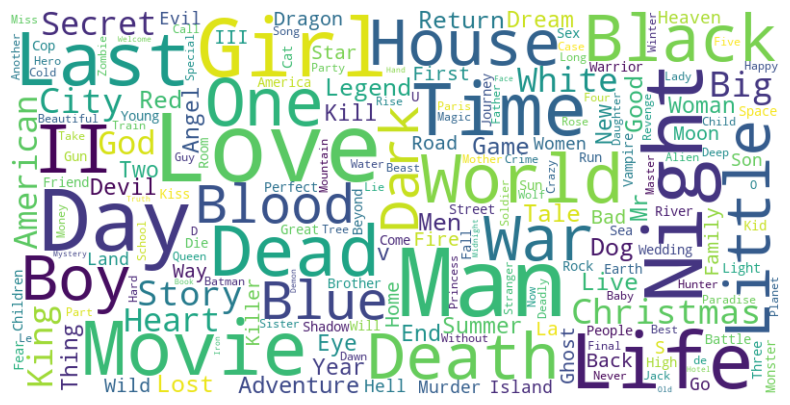

In [32]:
titulo = ' '.join(movies_id_unico['title'])

wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    #max_words=50,
    background_color='white',
    colormap='viridis'
).generate(titulo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar los ejes
plt.show()

wordcloud.to_file('nube_de_palabras.png')


En el overview de las películas

In [33]:
nltk.download('stopwords')

descripcion = df_movies['overview'].dropna().tolist()

# Crear una lista de palabras a partir de los títulos
todas_las_palabras = []
token = set(stopwords.words('english'))  # Eliminamos las palabras más comunes del ingles.
for palabras in descripcion:
    words = palabras.lower().translate(str.maketrans('', '', string.punctuation)).split()
    filtered_words = [word for word in words if word not in token]
    todas_las_palabras.extend(filtered_words)

word_counts = Counter(todas_las_palabras)

most_common_words = word_counts.most_common(10)
print(most_common_words)

[nltk_data] Downloading package stopwords to C:\Users\Practical
[nltk_data]     Tecno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('life', 21976), ('one', 20891), ('young', 19856), ('new', 17123), ('two', 15573), ('world', 15062), ('man', 14620), ('love', 14180), ('family', 13502), ('story', 13036)]


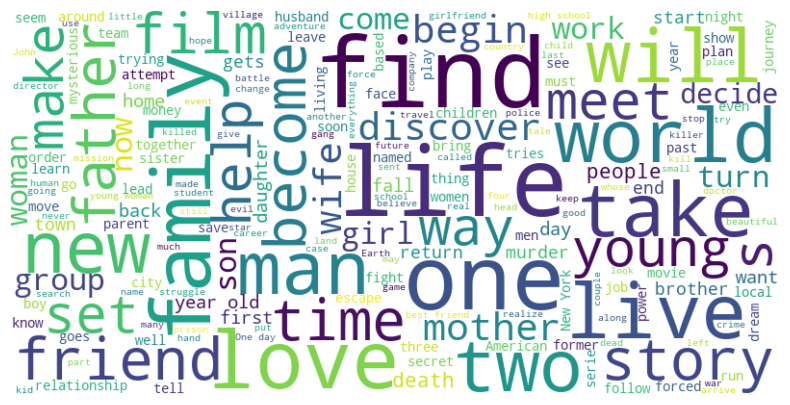

In [34]:
descripcion = ' '.join(movies_id_unico['overview'])

wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=100,
    #max_words=50,
    background_color='white',
    colormap='viridis'
).generate(descripcion)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar los ejes
plt.show()

wordcloud.to_file('nube_de_palabras.png')